In [2]:
#importing the libraries and the study file/set
import pandas as pd

orders = pd.read_csv(r"C:\Users\user\Downloads\food_orders_Analysis.csv")
print(orders.head())

   Order ID Customer ID Restaurant ID  Order Date and Time  \
0         1       C8270         R2924  2024-02-01 01:11:52   
1         2       C1860         R2054  2024-02-02 22:11:04   
2         3       C6390         R2870  2024-01-31 05:54:35   
3         4       C6191         R2642  2024-01-16 22:52:49   
4         5       C6734         R2799  2024-01-29 01:19:30   

  Delivery Date and Time  Order Value  Delivery Fee    Payment Method  \
0    2024-02-01 02:39:52         1914             0       Credit Card   
1    2024-02-02 22:46:04          986            40    Digital Wallet   
2    2024-01-31 06:52:35          937            30  Cash on Delivery   
3    2024-01-16 23:38:49         1463            50  Cash on Delivery   
4    2024-01-29 02:48:30         1992            30  Cash on Delivery   

  Discounts and Offers  Commission Fee  Payment Processing Fee  \
0            5% on App             150                      47   
1                  10%             198                  

In [5]:
#Printing information about the dataframe

print(orders.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 12 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   Order ID                1000 non-null   int64 
 1   Customer ID             1000 non-null   object
 2   Restaurant ID           1000 non-null   object
 3   Order Date and Time     1000 non-null   object
 4   Delivery Date and Time  1000 non-null   object
 5   Order Value             1000 non-null   int64 
 6   Delivery Fee            1000 non-null   int64 
 7   Payment Method          1000 non-null   object
 8   Discounts and Offers    815 non-null    object
 9   Commission Fee          1000 non-null   int64 
 10  Payment Processing Fee  1000 non-null   int64 
 11  Refunds/Chargebacks     1000 non-null   int64 
dtypes: int64(6), object(6)
memory usage: 93.9+ KB
None


In [4]:
#Conduct Data cleaning by:
#     -Converting 'order date and time' and 'delivery date and time'
#     to a datetime format
#     -convert 'discunts and offers' to a consistent numeric value or calculate 
#     the discount amounts
#     -Enusure that all monetary values are well represented for calculations

import pandas as pd 

from datetime import datetime
orders['Order Date and Time'] = pd.to_datetime(orders['Order Date and Time'])
orders['Delivery Date and Time'] = pd.to_datetime(orders['Delivery Date and Time'])

#Creating an extract function
def ex_discount(discount_str):
    if 'off' in str(discount_str):
        return float(discount_str.split(' ')[0])
    elif '%' in str(discount_str):
        return float(discount_str.split('%')[0])
    else:
        return 0.0
    
#Use the function to create a new Discount value column
orders['Discount Percentage'] = orders['Discounts and Offers'].apply(lambda x: ex_discount(x))

#For the percentage discounts, calculate  the discount based on CustomerID
orders['Discount Amount'] = orders.apply(lambda x:(x['Order Value'] * x['Discount Percentage'] / 100) 
                                        if x['Discount Percentage'] > 1
                                        else x['Discount Percentage'], axis=1)

#Adjust Discount Amount for fixed discounts directly specified in the Discounts and offers 
orders['Discount Amount'] = orders.apply(lambda x: x['Discount Amount']
                                         if x['Discount Percentage'] <=1
                                         else x['Order Value'] * x['Discount Percentage']/100, axis=1)
print(orders[['Order Value', 'Discounts and Offers', 'Discount Percentage', 'Discount Amount']].head(),orders.dtypes)

   Order Value Discounts and Offers  Discount Percentage  Discount Amount
0         1914            5% on App                  5.0            95.70
1          986                  10%                 10.0            98.60
2          937         15% New User                 15.0           140.55
3         1463                  NaN                  0.0             0.00
4         1992         50 off Promo                 50.0           996.00 Order ID                           int64
Customer ID                       object
Restaurant ID                     object
Order Date and Time       datetime64[ns]
Delivery Date and Time    datetime64[ns]
Order Value                        int64
Delivery Fee                       int64
Payment Method                    object
Discounts and Offers              object
Commission Fee                     int64
Payment Processing Fee             int64
Refunds/Chargebacks                int64
Discount Percentage              float64
Discount Amount        

In [5]:
#Cost analysis considers 
#     Delivery fee
#     Payment processing fee
#     Discount amount

#Calculating total costs and revenue per order 
orders['Total Costs'] = orders['Delivery Fee'] + orders['Payment Processing Fee'] + orders['Discount Amount']
orders['Revenue'] = orders['Commission Fee']
orders['Profit'] = orders['Revenue'] - orders['Total Costs']

#Aggregate data to calculate the  overall metrics
total_orders = orders.shape[0]
total_revenue = orders['Revenue'].sum()
total_costs = orders['Total Costs'].sum()
total_profit = orders['Profit'].sum()

all_metrics = {
    "Total Orders": total_orders,
    "Total Revenue": total_revenue,
    "Total Costs": total_costs,
    "Total Profit": total_profit
}

print(all_metrics)


{'Total Orders': 1000, 'Total Revenue': 126990, 'Total Costs': 232709.85, 'Total Profit': -105719.85}


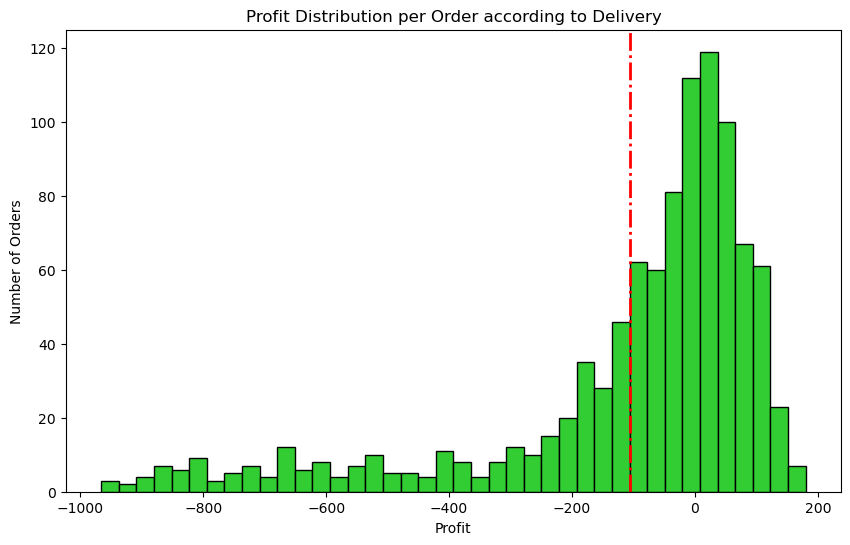

In [9]:
#Plotting a Histogram that proves that the current metrics are not sustainable for business

import matplotlib.pyplot as plt

#histogram of porfits per order
plt.figure(figsize=(10, 6))
plt.hist(orders['Profit'], bins=40, color='limegreen', edgecolor='black')
plt.title('Profit Distribution per Order according to Delivery')
plt.xlabel('Profit')
plt.ylabel('Number of Orders')
plt.axvline(orders['Profit'].mean(), color='red', linestyle='dashdot', linewidth=2)
plt.show()

#The dashdot line indicates the aveerage profit which is in the negative trajectory indicating loss
#A noticeable number of orders are resulting in a loss

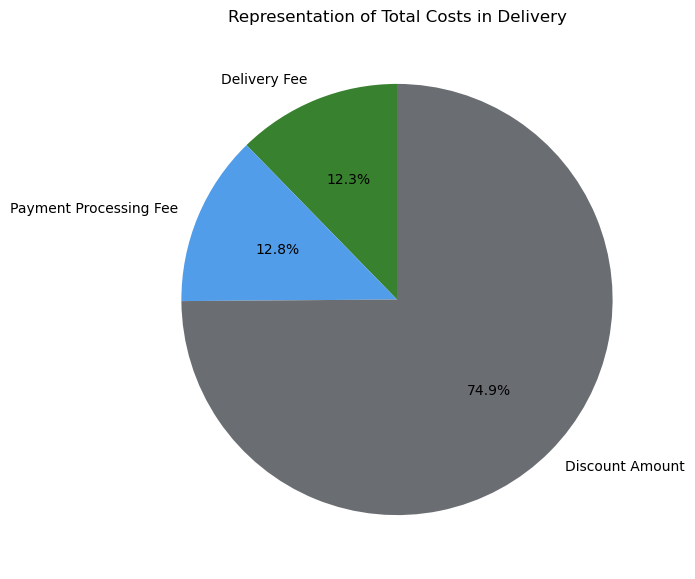

In [28]:
#Understanding the proportion of total costs using a piechart
chart_breakdown = orders[['Delivery Fee', 'Payment Processing Fee', 'Discount Amount']].sum()
plt.figure(figsize=(7, 7))
plt.pie(chart_breakdown, labels=chart_breakdown.index, autopct='%1.1f%%', startangle=90, 
        colors=['#38812F', '#519DE9', '#6A6E73'])
plt.title('Representation of Total Costs in Delivery')
plt.show()


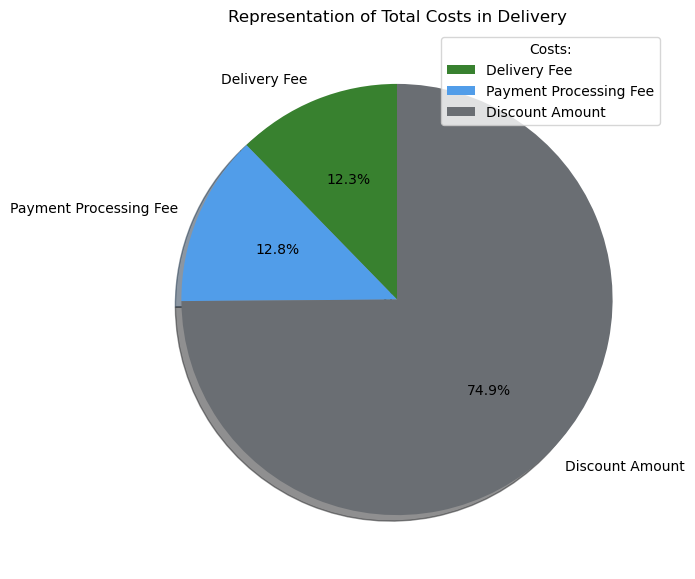

In [27]:
chart_breakdown = orders[['Delivery Fee', 'Payment Processing Fee', 'Discount Amount']].sum()
plt.figure(figsize=(7, 7))
plt.pie(chart_breakdown, labels=chart_breakdown.index, autopct='%1.1f%%', startangle=90, 
        colors=['#38812F', '#519DE9', '#6A6E73'], shadow = True)
plt.title('Representation of Total Costs in Delivery')
plt.legend(title='Costs:')
plt.show()

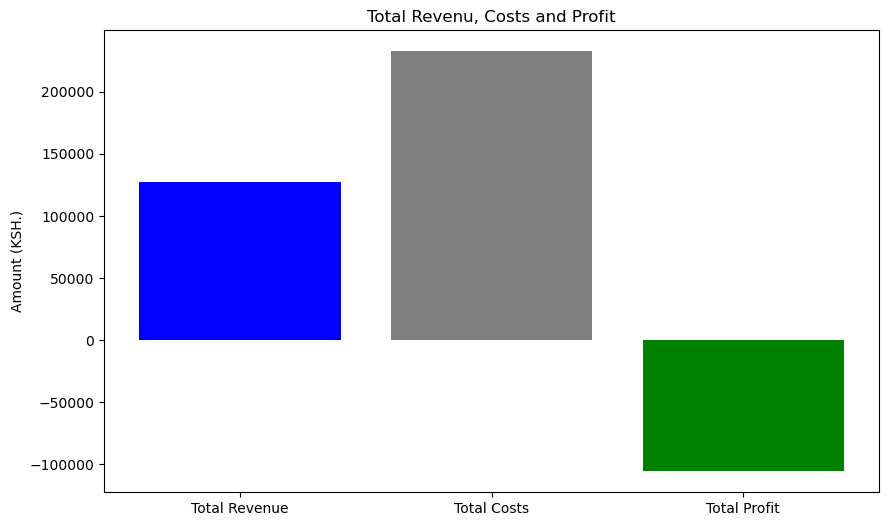

In [29]:
#Comparing total revenue, total costs and total profits(loss in this case)
#bar chart representing the sttaed metrics
totals = ['Total Revenue', 'Total Costs', 'Total Profit']
values = [total_revenue, total_costs, total_profit]

plt.figure(figsize=(10, 6))
plt.bar(totals, values, color=['blue', 'grey', 'green'])
plt.title('Total Revenu, Costs and Profit')
plt.ylabel('Amount (KSH.)')
plt.show()

#According to the bar, the costs are above the revenue which will lead to a loss


In [30]:
#Next strategy targeting the profits
#Filter the set for profitable orders
profit_orders = orders[orders['Profit']>0]

#Caluclate the average commission percentage for the profitable orders
profit_orders['Commission Percentage'] = (profit_orders['Commission Fee'] / profit_orders['Order Value']) * 100

#Average dicount percentage for profitable orders
profit_orders['Proper Discount Percentage'] = (profit_orders['Discount Amount']/ profit_orders['Order Value']) *100

#Calculate new averages
new_commission_percentage = profit_orders['Commission Percentage'].mean()
new_discount_percentage = profit_orders['Proper Discount Percentage']. mean()

print(new_commission_percentage, new_discount_percentage)

#A higher commission rate on orders is best for achieving profitability
#lower discounts might result to profitability much better without deterring order volume

30.508436145149435 5.867469879518072


C:\Users\user\AppData\Local\Temp\ipykernel_8648\1972100100.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  profit_orders['Commission Percentage'] = (profit_orders['Commission Fee'] / profit_orders['Order Value']) * 100
C:\Users\user\AppData\Local\Temp\ipykernel_8648\1972100100.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  profit_orders['Proper Discount Percentage'] = (profit_orders['Discount Amount']/ profit_orders['Order Value']) *100


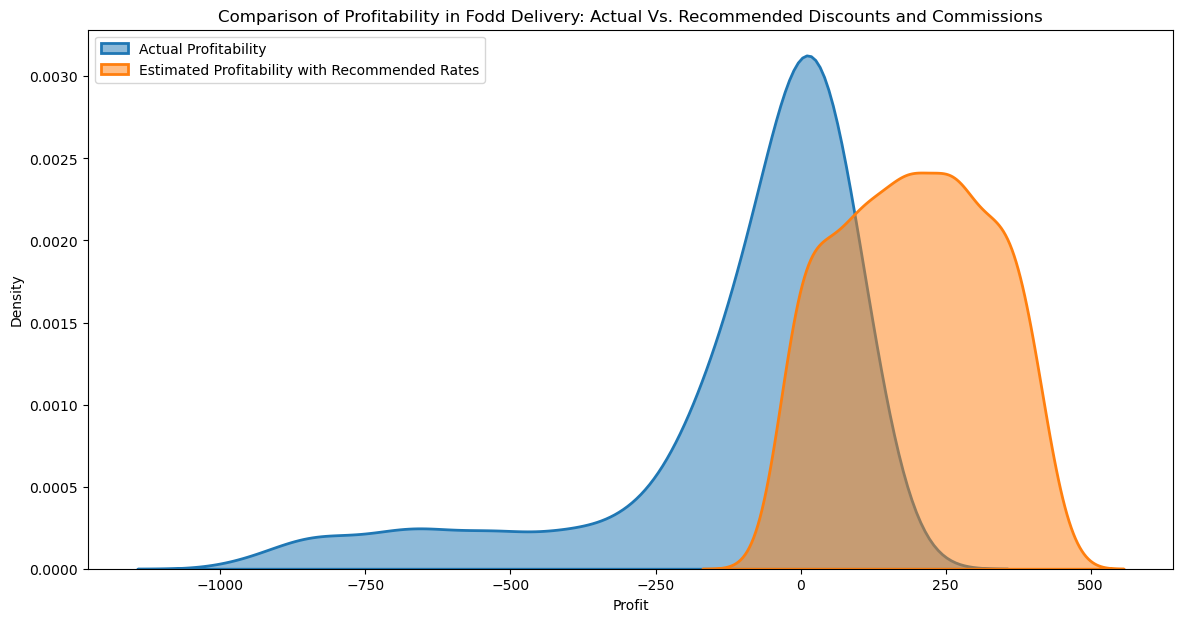

In [33]:
#Simulate profitability with recommended discounts and commissions
recommend_commission_percentage = 30.0 #30.508436145149435
recommend_discount_percentage = 6.0 #5.867469879518072

#Calculate the simulated commission fee and discount amount using recommended perecnatges
orders['Simulated commission fee'] = orders['Order Value'] * (recommend_commission_percentage /100)
orders['Simulated discount fee'] = orders['Order Value'] * (recommend_discount_percentage /100)

#Recalculate the total costs and profits using the simulated values 
orders['Simulated Total Costs'] = (orders['Delivery Fee']+
                                  orders['Payment Processing Fee']+
                                  orders['Simulated discount fee'])
orders['Simulated Profits']=(orders['Simulated commission fee']-
                           orders['Simulated Total Costs'])

#Visualizing through comparison
import seaborn as sns

plt.figure(figsize=(14, 7))

#Actual Profitability
sns.kdeplot(orders['Profit'], label='Actual Profitability', fill=True, alpha=0.5, linewidth=2)

#simulated profitability
sns.kdeplot(orders['Simulated Profits'], label='Estimated Profitability with Recommended Rates', fill=True, alpha=0.5, linewidth=2)

plt.title('Comparison of Profitability in Fodd Delivery: Actual Vs. Recommended Discounts and Commissions')
plt.xlabel('Profit')
plt.ylabel('Density')
plt.legend(loc='upper left')
plt.show()